In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fruits-with-colors-dataset/fruit_data_with_colors.txt


In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
fruits=pd.read_table('/kaggle/input/fruits-with-colors-dataset/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape

(59, 7)

In [5]:
fruit_type=fruits.fruit_name.unique()
fruit_type

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [9]:
X=fruits[['mass','width','height','color_score']]
y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

<IPython.core.display.Javascript object>


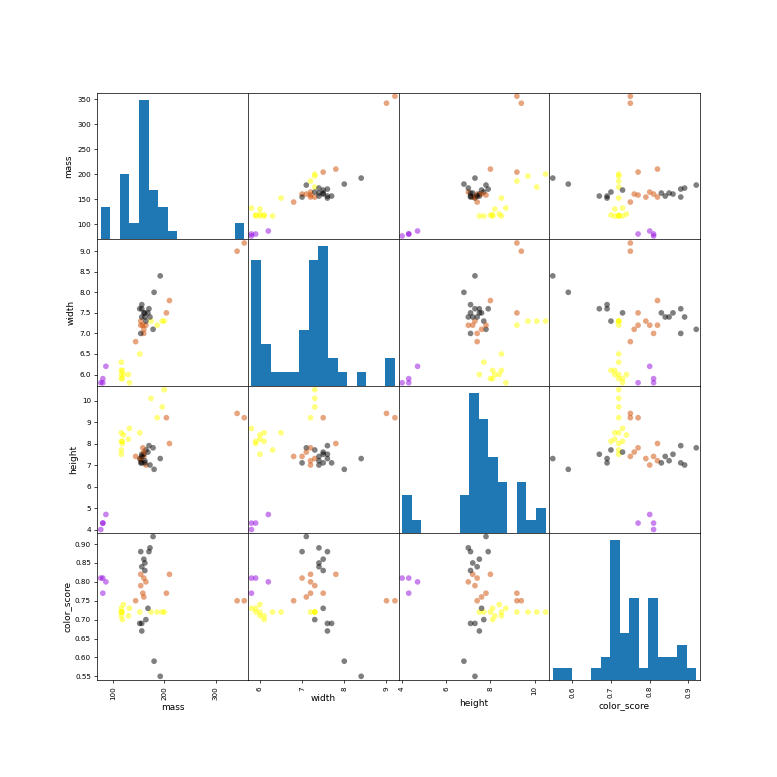

In [14]:
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
scatter=pd.plotting.scatter_matrix(X_train,c=y_train,marker='o',s=40,hist_kwds={'bins':15},figsize=(12,12),cmap=cmap)

<IPython.core.display.Javascript object>


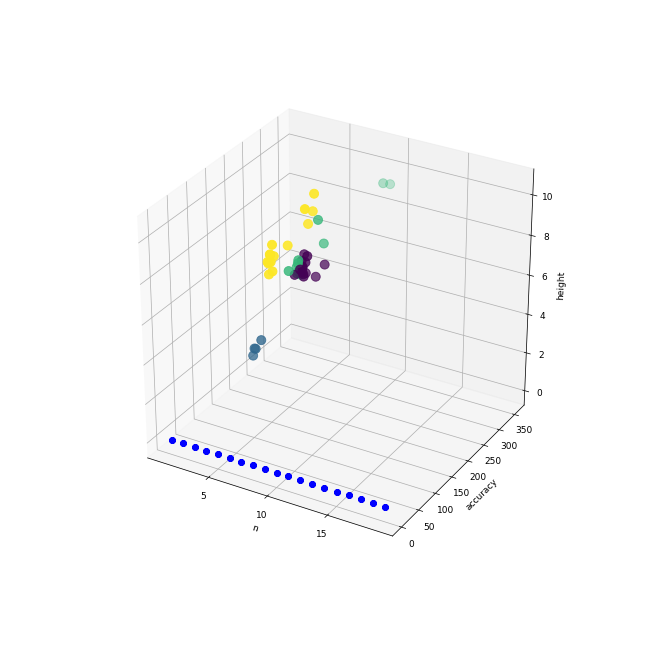

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'],X_train['mass'],X_train['height'],c=y_train,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('mass')
ax.set_zlabel('height')
# legend=ax.legend(*scatter.legend_elements(),loc='best',title='fruits')
# ax.add_artist(legend)
plt.show()


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
knn.score(X_test,y_test)

0.5333333333333333

<IPython.core.display.Javascript object>


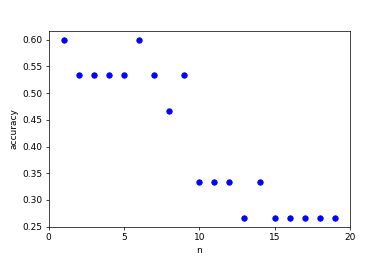

In [43]:
fig=plt.figure()
n=[i for i in range(1,20)]
score=[]
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
plt.plot(n,score,'bo')
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks([0,5,10,15,20])
plt.title('testing set')
plt.show()

<IPython.core.display.Javascript object>


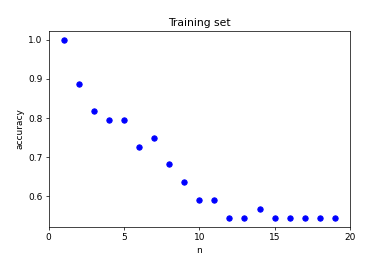

In [45]:
fig=plt.figure()
n=[i for i in range(1,20)]
score=[]
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_train,y_train))
plt.plot(n,score,'bo')
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks([0,5,10,15,20])
plt.title('Training set')
plt.show()